# Лабораторная по pandas, numpy, scipy.stats, matplotlib, seaborn


### Дедлайн: 26 декабря 23:59

Работа принимается один раз, как только вы отправили ее своему семинаристу по любому канаду связи.

Плагиат будет караться полной отменой баллов за лабораторную.


 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)
 - [Официальная документация scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

# Часть 1 `Numpy`, `Matplotlib`, `scipy.stats`

In [209]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

## 1. Данные

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1 (3 балла)
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [210]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
def coin(size=1):
    return np.random.choice([0, 1], size=size)

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [211]:
coin(size=10)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

**Решение**

In [212]:
def uniform(size=1, precision=30):
    bits = coin(size=(size, precision))

    weights = 1 / (2 ** np.arange(1, precision + 1))

    values = bits @ weights

    return values

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

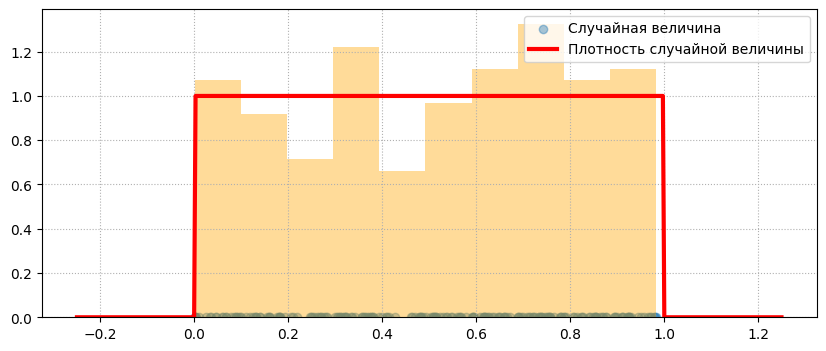

In [213]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision = 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample,
    np.zeros(size),
    alpha = 0.4,
    label = "Случайная величина"
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample,
    bins = 10,
    density = True,
    alpha = 0.4,
    color = "orange"
)

# рисуем график плотности
plt.plot(
    grid,
    sps.uniform.pdf(grid),
    color = 'red',
    linewidth = 3,
    label = "Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

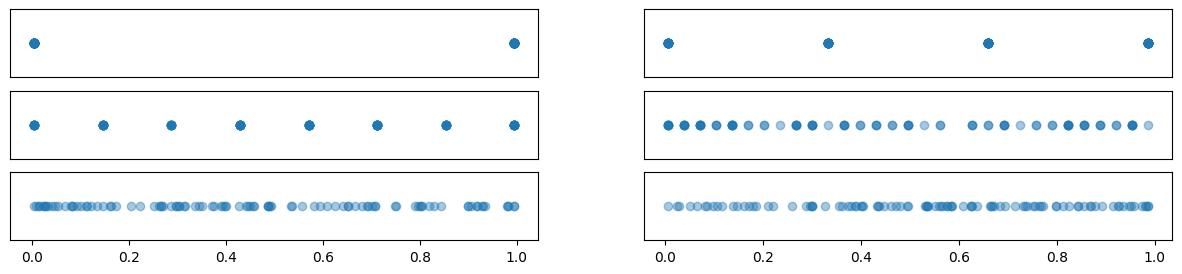

In [214]:
size = 100

plt.figure(figsize = (15, 3))

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size, precision),
        np.zeros(size),
        alpha = 0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**

In [215]:
 # При низкой точности (precision = 1-3) значения случайных величин сосредоточены в ограниченном диапазоне (например, с precision = 1 возможны только два значения: 0 и 0.5).
 # Чем выше precision, тем более равномерно распределены значения в диапазоне [0, 1].

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [216]:
def normal(size=1, loc=0, scale=1, precision=30):
    size = np.asarray(size)

    # генерируем два массива равномерных сл вел
    xi = uniform(size)
    eta = uniform(size)

    # применяем преобразование Бокса-Мюллера
    z1 = np.sqrt(-2 * np.log(eta)) * np.cos(2 * np.pi * xi)
    z2 = np.sqrt(-2 * np.log(eta)) * np.sin(2 * np.pi * xi)

    result = loc + scale * np.concatenate((z1, z2))[:size]

    return result

normal(size=20)

array([ 0.91087566,  0.33642645,  0.64516352, -1.06398645,  1.37693707,
       -0.50592543,  0.23100691,  1.45302667,  0.12011219, -1.32867506,
       -0.18362803, -1.00209483,  0.17568117, -1.0030309 ,  1.20541149,
        0.70782829,  0.62993877,  1.62867693, -0.84247525,  1.92576373])

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

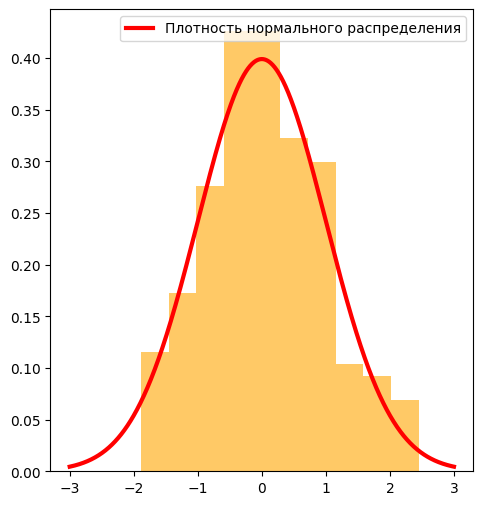

In [217]:
data = normal(size=200)

# Отрисовка графика
plt.figure(figsize = (12, 6))

# строим нормированную полупрозрачную гистограмму
plt.subplot(1, 2, 1)
plt.hist(
    data,
    bins = 10,
    density = True,
    alpha = 0.6,
    color = "orange"
)

# рисуем график плотности
x = np.linspace(-3, 3, 1000)

plt.plot(
    x,
    (1/(np.sqrt(2 * np.pi))) * np.exp(-0.5 * x**2),
    color = 'red',
    linewidth = 3,
    label = "Плотность нормального распределения"
)

plt.legend()
plt.show()

Решение основывается на **методе обратного преобразования**

Поскольку ф-ия экспоненциального распределения $F(x) = (1 - e^{-\lambda x}) \cdot I(x > 0)$ является строго монотонной и непрерывной на $R$, то у неё есть обратная ф-ия $F^{-1}: [0, 1] \rightarrow R$.
Таким образом, если $U_1, \ldots, U_n$ - выборка из равномерного распределения, то $X_1, \ldots, X_n,$ где $X_i = F^{-1}(U_i),$ - выборка из экспоненциального распределения

$F^{-1}(x) = -\dfrac{1}{\lambda}{ }\ln(1 - x)$

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [ ]:
def expon(size=1, lambd=1, precision=30):
       # Генерация равномерных случайных величин на отрезке (0, 1)
    U = uniform(size)

    # Применение обратной функции распределения
    X = - (1 / lambd) * np.log(1 - U)

    return X

expon(10)

array([1.41027572, 0.61753007, 1.31079581, 0.2540726 , 0.18553397,
       0.06399134, 0.29958705, 0.1332822 , 0.03260442, 0.89652675])

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

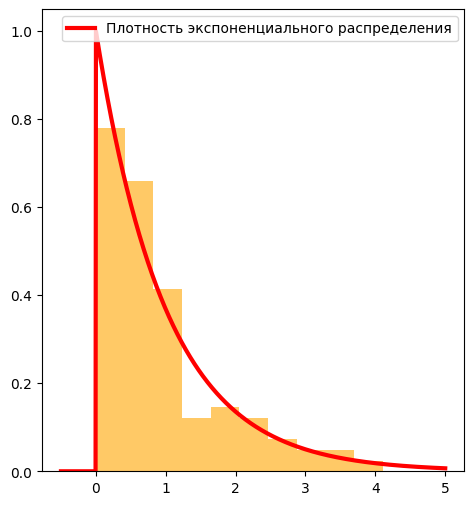

In [ ]:
data = expon(size=100, lambd=1)

# Отрисовка графика
plt.figure(figsize=(12, 6))

# Строим нормированную полупрозрачную гистограмму
plt.subplot(1, 2, 1)
plt.hist(
    data,
    bins=10,
    density=True,
    alpha=0.6,
    color="orange"
)

# Рисуем график плотности экспоненциального распределения
x = np.linspace(-0.5, 5, 1000)

plt.plot(
    x,
    np.exp(-x) * (x >= 0),
    color='red',
    linewidth=3,
    label="Плотность экспоненциального распределения"
)

plt.legend()

plt.show()

**Вывод по задаче:**

In [ ]:
# В данной части задачи мы реализовали функции равномерного и экспоненциального распределений (без использования библиотечных функций для генерации случайных чисел),
# а также визуализировали их и построили графики плотности.

### Задача 2  (3 балла)
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива.

*Авторское решение занимает одну строчку.*

In [232]:
def matrix_multiplication(A, B):

    A = np.array(A)
    B = np.array(B)

    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))


    # получаем размеры матриц
    m, n = A.shape
    k, p = B.shape

    # Создаем результирующую матрицу C
    C = np.zeros((m, p), dtype=A.dtype)

    # Выполняем матричное умножение, используя векторизацию для обновления всей строки C[i, :] за один раз
    for i in range(m):
        for k in range(n):
            C[i, :] += A[i, k] * B[k, :]

    return C

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [231]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

7.549516567451064e-14

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [222]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [223]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B)

print(10)

CPU times: user 279 ms, sys: 3.49 ms, total: 283 ms
Wall time: 282 ms
CPU times: user 3.63 ms, sys: 2.98 ms, total: 6.61 ms
Wall time: 3.45 ms
CPU times: user 4.12 ms, sys: 0 ns, total: 4.12 ms
Wall time: 2.07 ms
CPU times: user 21.8 s, sys: 86.5 ms, total: 21.9 s
Wall time: 22.6 s
CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 11.8 ms
10


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [ ]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.

    '''

    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)

    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))

    C = <...>

    return C

SyntaxError: invalid syntax (<ipython-input-103-6022492f04e1>, line 16)

### Задача 3  (4 балла)

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа.

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации.
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [ ]:
def my_brownian_motion(sigma, T, num_intervals, dimension, num_particles):
    delta_t = T / num_intervals
    # Генерируем стандартные нормальные случайные величины
    increments = np.random.normal(0, sigma * np.sqrt(delta_t),
                                  (num_particles, dimension, num_intervals))
    trajectories = np.cumsum(increments, axis=2)
    return trajectories


**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

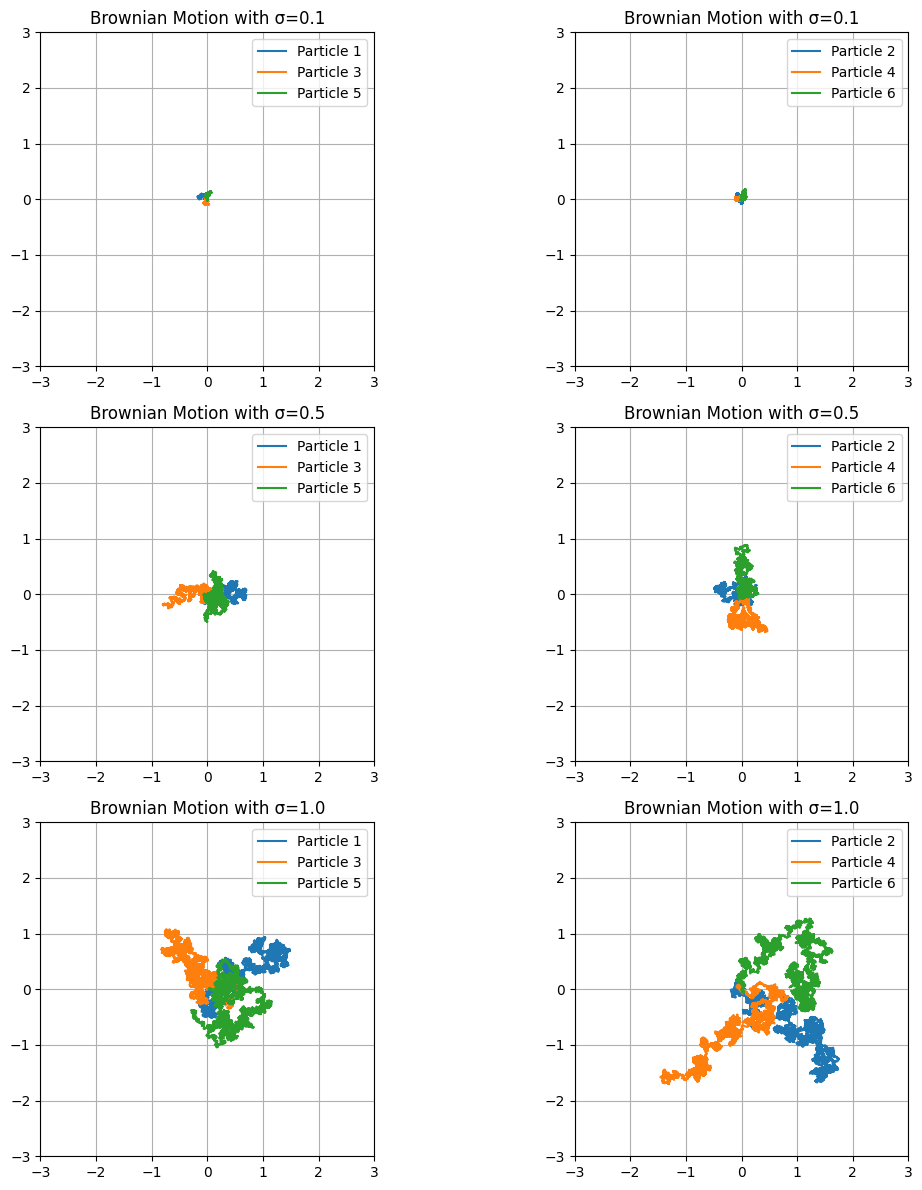

In [ ]:
sigmas = [0.1, 0.5, 1.0]
num_particles = 6
num_intervals = 10000
T = 1.0

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i, sigma in enumerate(sigmas):
    trajectories = my_brownian_motion(sigma, T, num_intervals, dimension=2, num_particles=num_particles)

    for j in range(num_particles):
        axs[i, j % 2].plot(trajectories[j, 0], trajectories[j, 1], label=f'Particle {j+1}')

    axs[i, 0].set_title(f'Brownian Motion with σ={sigma}')
    axs[i, 1].set_title(f'Brownian Motion with σ={sigma}')

    axs[i, 0].set_aspect('equal')
    axs[i, 1].set_aspect('equal')

    for ax in axs[i]:
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.grid()
        ax.legend()

plt.tight_layout()
plt.show()

Как вид траектории зависит от $\sigma$?

In [ ]:
# Чем больше значение σ, тем больше отклонения от начальной точки.

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

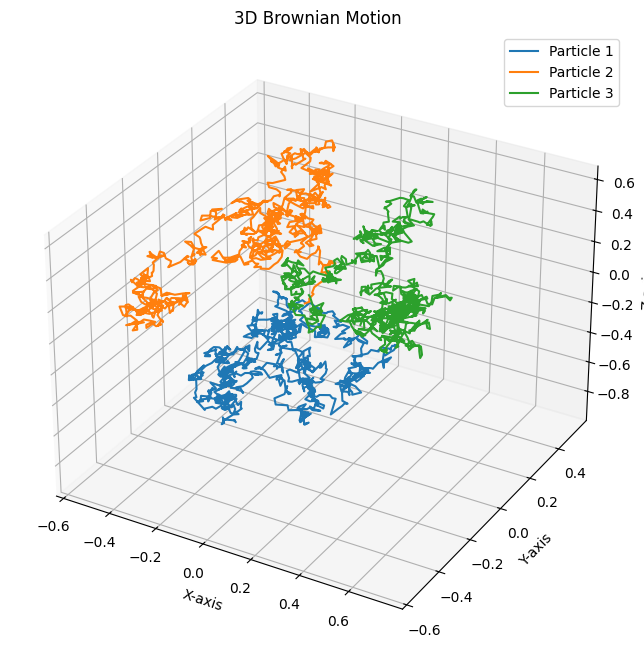

In [ ]:
sigma = 0.5
T = 1.0
num_intervals = 1000
dimension = 3
num_particles = 3

trajectories = my_brownian_motion(sigma, T, num_intervals, dimension, num_particles)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# построение траекторий
for i in range(num_particles):
    ax.plot(trajectories[i, 0], trajectories[i, 1], trajectories[i, 2], label=f'Particle {i+1}')

ax.set_title('3D Brownian Motion')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()
plt.show()

**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

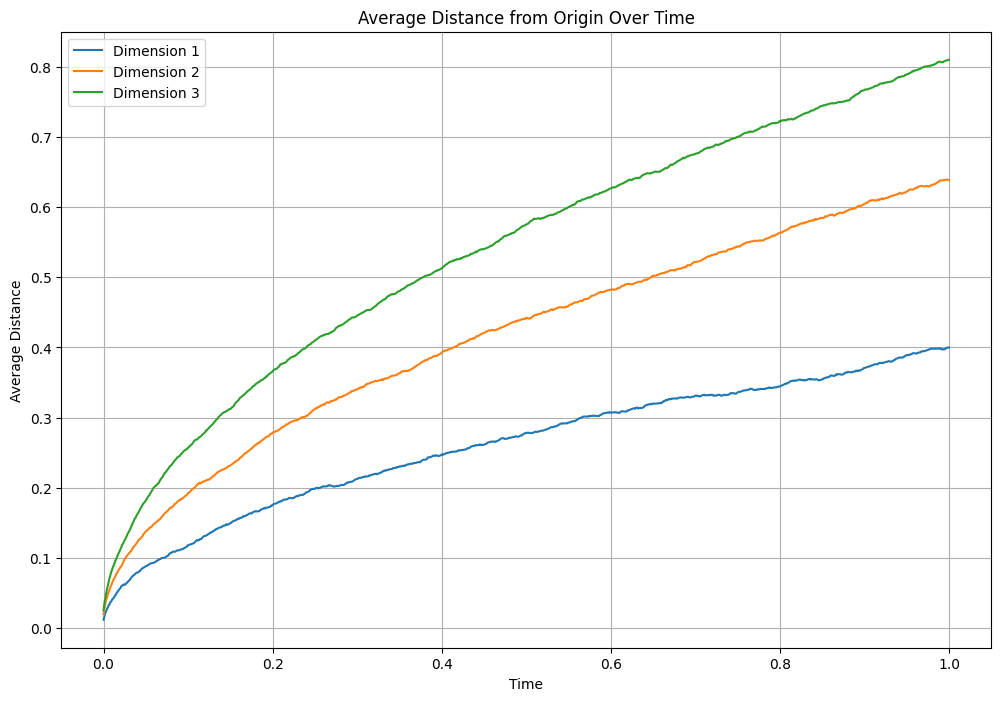

In [ ]:
def average_distance(trajectories):
    distances = np.linalg.norm(trajectories, axis=1)  # расстояния для каждой частицы
    return np.mean(distances, axis=0)  # среднее расстояние для всех частиц

sigma = 0.5
T = 1.0
num_intervals = 1000
num_particles = 1000

dimensions = [1, 2, 3]
average_distances = {dim: [] for dim in dimensions}

for dimension in dimensions:
    trajectories = my_brownian_motion(sigma, T, num_intervals, dimension, num_particles)
    avg_distances = average_distance(trajectories)
    average_distances[dimension] = avg_distances

plt.figure(figsize=(12, 8))

for dimension in dimensions:
    plt.plot(np.linspace(0, T, num_intervals), average_distances[dimension], label=f'Dimension {dimension}')

plt.title('Average Distance from Origin Over Time')
plt.xlabel('Time')
plt.ylabel('Average Distance')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Выводы:
# 1. Как показывает график, среднее расстояние частицы до начала координат увеличивается со временем.
# 2. Среднее расстрояние зависит от размерности: В трехмерном пространстве среднее расстояние больше по сравнению с двумерным, в двумерном оно также больше по сравнению с одномерным (видно на графике).
# 3. Чуть выше была найдена зависимость от σ: чем больше значение σ, тем больше среднее расстояние частицы до начала координат.


# Часть 2 `Pandas`, `Matplotlib`, `Seaborn`

## Задача 1  (2 балла)

Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [ ]:
coins = pd.read_csv('coins.csv', index_col='date')

Посмотрим что получилось

In [ ]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете?

In [ ]:
unique_coins = coins['symbol'].nunique()
unique_coins # 66 монет

66

#### 2. За какой период данные мы имеем?

In [ ]:
dates = coins.index.min(), coins.index.max()
dates # с 2013-04-28 по 2018-06-06

('2013-04-28', '2018-06-06')

#### 3. Есть ли пропуски в данных? Какой природы эти пропуски?

In [ ]:
missing_data = coins.isnull().sum()
missing_data[missing_data > 0] # пропуски: 327 в price , 1520 в txCount, 1830 в txVolume, 1520 в activeAddresses

,0
price,327
txCount,1520
txVolume,1830
activeAddresses,1520


#### 4. У какой монеты и когда была самая высокая цена?

In [ ]:
max_price = coins['price'].max()

max_price_row = coins[coins['price'] == max_price].iloc[0]

max_price_coin = max_price_row['name']
max_price_date = max_price_row.name
max_price_value = max_price

(max_price_coin, max_price_date, max_price_value) # Bitcoin, 2017-12-17, 19475.8


('Bitcoin', '2017-12-17', 19475.8)

#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями.

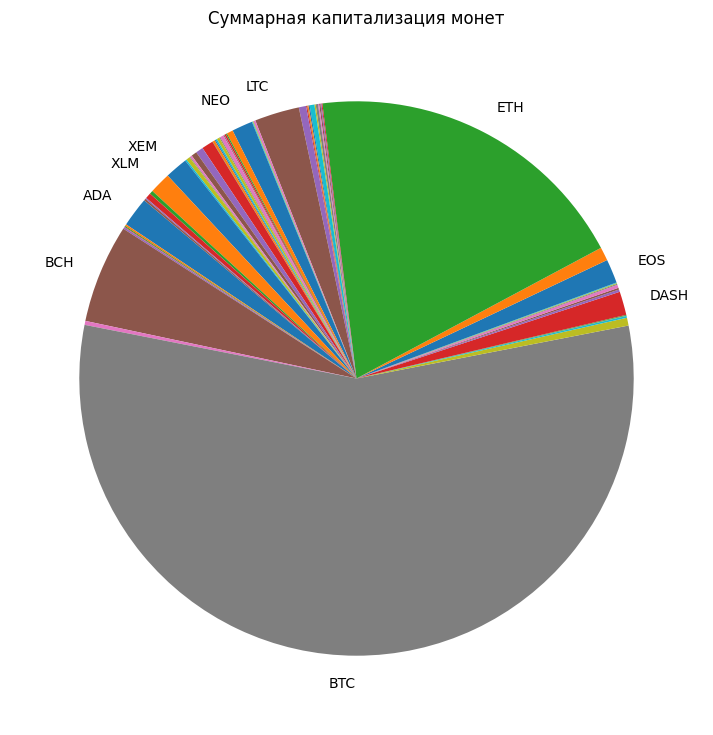

('BTC', 57439466431000.0, 'CTXC', 10935015000.0)

In [ ]:
# группировка и суммирование капитализации
market_cap = coins.groupby('symbol')['market'].sum()

highest_market_cap_coin = market_cap.idxmax()
highest_market_cap_value = market_cap.max()
lowest_market_cap_coin = market_cap.idxmin()
lowest_market_cap_value = market_cap.min()

# построение круговой диаграммы
plt.figure(figsize=(9, 9))
labels = [label if value > market_cap.sum() * 0.01 else '' for label, value in zip(market_cap.index, market_cap)]

plt.pie(market_cap, labels=labels, startangle=140)
plt.title('Суммарная капитализация монет')

plt.show()

(highest_market_cap_coin, highest_market_cap_value, lowest_market_cap_coin, lowest_market_cap_value) # BTC, 57439466431000.0, CTXC, 10935015000.0

## 2. Визуализация (2 балла)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [ ]:
import matplotlib.pyplot as plt

def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # фильтруем данные по названию и датам
    df = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)]

    if df.empty:
        print(f"No data available for {symbol} between {start_date} and {end_date}.")
        return

    plt.figure(figsize=(14, 7))


    plt.plot(df.index, df['open'], label='Open Price', color='blue', marker='o', markersize=3)
    plt.plot(df.index, df['close'], label='Close Price', color='green', marker='o', markersize=3)
    plt.fill_between(df.index, df['low'], df['high'], color='lightgrey', alpha=0.5, label='High/Low Range')

    # добавляем заголовок и подписи
    plt.title(f'Price Action for {df["name"].iloc[0]} ({symbol}) from {start_date} to {end_date}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)


    plt.grid()
    plt.legend()
    plt.show()


Посмотрим, что получилось:

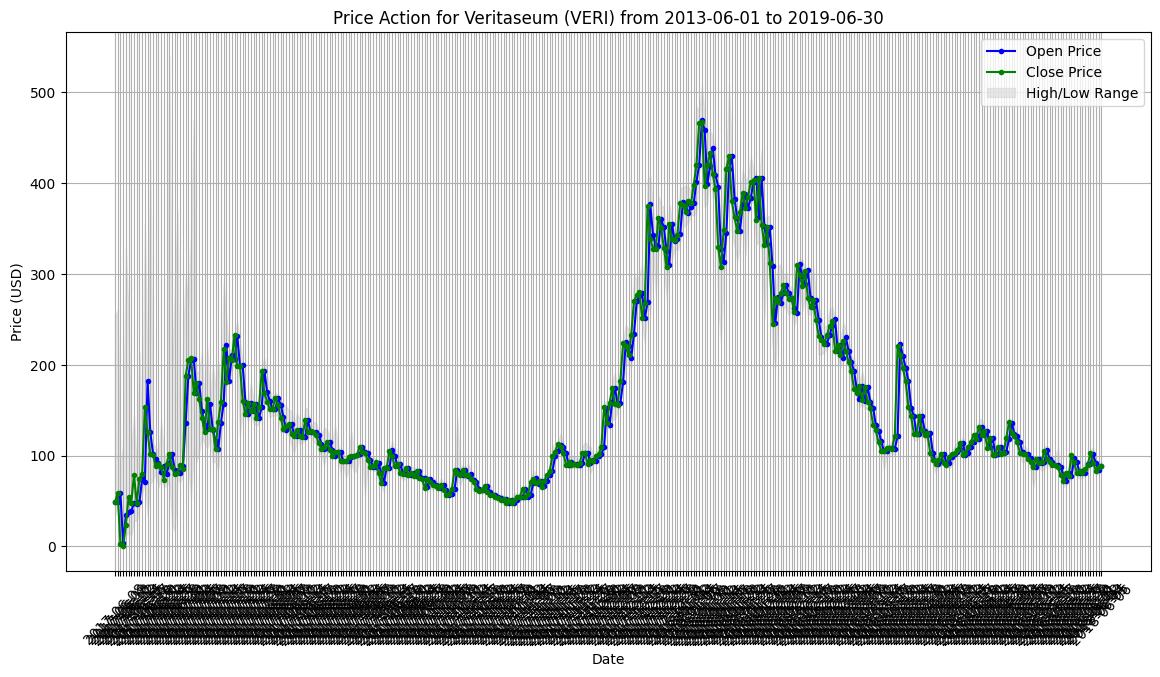

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')
# даты смешиваются, т.к. промежуток большой, можно ещё проверить на
# plot_fancy_price_action(coins=coins, symbol='BTC', start_date='2013-06-01', end_date='2013-07-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (2 балла)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # фильтруем данные по названию и дате
    filtered_data = coins[(coins['symbol'] == symbol) &
                           (coins.index >= start_date) &
                           (coins.index <= end_date)].copy()

    # вычисляем pnd для каждого дня
    filtered_data.loc[:, 'pnd'] = filtered_data['high'] / filtered_data[['open', 'close']].max(axis=1)

    # находим день с максимальным pnd
    max_pnd_day = filtered_data['pnd'].idxmax()
    max_pnd_value = filtered_data['pnd'].max()

    return max_pnd_day, max_pnd_value


In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01') # 2017-11-29, 1.1428940004366206

('2017-11-29', 1.1428940004366206)

#### Сравните эти значения для разных монет.

In [ ]:
# получаем все монеты
symbols = coins['symbol'].unique()

for symbol in symbols:
    max_day, max_value = find_most_severe_pump_and_dump(coins, symbol=symbol, start_date='2017-06-01', end_date='2018-06-01')
    print(f"Максимальный pump'n'dump для {symbol} был {max_value} на {max_day}")

Максимальный pump'n'dump для BTC был 1.1428940004366206 на 2017-11-29
Максимальный pump'n'dump для LTC был 1.1082257158899496 на 2018-02-07
Максимальный pump'n'dump для DOGE был 1.2747326203208558 на 2017-12-17
Максимальный pump'n'dump для VTC был 1.3952095808383234 на 2017-10-22
Максимальный pump'n'dump для DGB был 1.359942799461642 на 2017-12-17
Максимальный pump'n'dump для DASH был 1.2031621370259378 на 2017-11-29
Максимальный pump'n'dump для MAID был 1.291362434422475 на 2017-06-07
Максимальный pump'n'dump для XLM был 1.332510511325105 на 2017-10-16
Максимальный pump'n'dump для XVG был 1.726864726979804 на 2017-12-17
Максимальный pump'n'dump для USDT был 1.099009900990099 на 2017-11-12
Максимальный pump'n'dump для XEM был 1.1358695652173911 на 2018-01-04
Максимальный pump'n'dump для ETH был 1.1433508255471652 на 2017-07-18
Максимальный pump'n'dump для REP был 1.477601285025879 на 2018-05-11
Максимальный pump'n'dump для DCR был 1.8054444587795122 на 2018-04-25
Максимальный pump'n'du

## 4. Окупаемость инвестиций (2 балла)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    initial_value = 0.0
    final_value = 0.0

    # проходим по всем вложениям
    for coin, amount in investments.items():
        filtered_data = coins[(coins['symbol'] == coin) &
                               (coins.index >= start_date) &
                               (coins.index <= end_date)]

        initial_price = filtered_data.loc[filtered_data.index[0], 'open']
        final_price = filtered_data.loc[filtered_data.index[-1], 'close']

        # считаем начальную и конечную стоимость портфеля
        initial_value += amount
        final_value += (amount / initial_price) * final_price  # Количество монет * цена на конец периода

    roi = (final_value - initial_value) / initial_value

    return roi

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.027221083037452142

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.35085448945653